In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df =  pd.read_csv(r'C:\Users\revan\Desktop\ml\modular2\mlmar7\data\Advertising (1).csv')
df.head()


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [37]:
x=df.drop(['sales'],axis=1)
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [38]:
y=df['sales']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model = LinearRegression()

In [42]:
model.fit(X_train,y_train)
test_pred=model.predict(X_test)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

<AxesSubplot:xlabel='sales', ylabel='Count'>

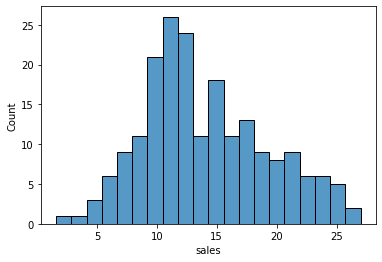

In [44]:
sns.histplot(data=df,x='sales',bins=20)

In [45]:
mean_absolute_error(y_test, test_pred)

1.236918849425931

In [46]:
mean_squared_error(y_test, test_pred)

2.348375242713827

In [47]:
np.sqrt(mean_squared_error(y_test, test_pred))

1.532440942651242

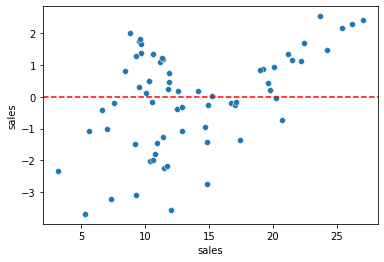

In [48]:
test_residuals = y_test - test_pred
sns.scatterplot(x=y_test, y= test_residuals)
plt.axhline(y=0, color="red",ls="--")

C:\Users\revan\anaconda3\envs\rev_mar8\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'residuals')

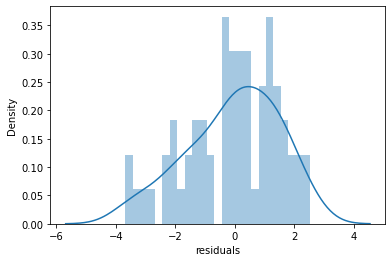

In [49]:
sns.distplot(test_residuals, bins=25, kde=True)
plt.xlabel("residuals")

In [50]:
from joblib import dump,load

In [51]:
import os
model_dir = "modles"
os.makedirs(model_dir,exist_ok=True)
filepath= os.path.join(model_dir, 'model.joblib')
dump(model, filepath)

['modles\\model.joblib']

In [52]:
load_model =  load(r'C:\Users\revan\Desktop\ml\modular2\mlmar7\modles\model.joblib')

In [53]:
load_model.coef_

array([ 0.04458371,  0.18525166, -0.00122463])

In [54]:
example=[[151,25,15]]
load_model.predict(example)

C:\Users\revan\anaconda3\envs\rev_mar8\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14.56263118])

In [55]:
# POLYNOMIAL REGRESSION
x1 =df.drop(['sales'], axis=1)
x1.head()


,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [56]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
poly_conv = PolynomialFeatures(degree=2, include_bias=False)
poly_conv.fit(x1)

PolynomialFeatures(include_bias=False)

In [58]:
poly_features = poly_conv.transform(x1)

In [59]:
poly_features.shape

(200, 9)

In [60]:
print(np.array(x1.iloc[0]))
print(poly_features[0])

[230.1  37.8  69.2]
[2.301000e+02 3.780000e+01 6.920000e+01 5.294601e+04 8.697780e+03
 1.592292e+04 1.428840e+03 2.615760e+03 4.788640e+03]


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=101)


In [62]:
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [63]:
test_pred_pol = model1.predict(X_test)
test_pred_pol

array([13.97204613, 19.31163632, 12.34937446, 16.77918795,  7.86585082,
        6.91555804, 20.11299294, 17.49707854, 10.56626076, 20.12510306,
        9.45653268, 14.08673516, 12.06855682, 23.37172536, 19.67600099,
        9.14838427, 12.13661295,  9.25938961,  8.42727726, 21.64817709,
        7.0207988 , 19.36930318, 27.21526812, 24.54515558,  8.98640103,
       11.86761484, 20.38278449,  9.22102483, 12.76121768,  8.64739673,
        8.67463214, 20.20034879, 10.93174941,  6.85739529, 18.29226844,
        9.5074497 , 10.35219229,  9.64459655,  7.4384789 , 11.03480643,
       12.66080843, 10.69057937, 11.23958513,  7.4725002 , 11.38637684,
       10.2667274 ,  6.12707279, 15.54892762, 13.43339421, 22.70762962,
       10.41887348, 13.24665286, 14.2399427 , 11.85682389, 11.71631169,
        5.5519889 , 25.01544605,  9.5463153 , 17.34861031, 15.7728373 ,
       15.51033662, 25.57307088,  8.60367331, 21.60788857, 12.34127765,
       22.21531611])

In [64]:
MAE = mean_absolute_error(y_test, test_pred_pol)
MAE

0.48428105352155515

In [65]:
RMSE = np.sqrt (mean_squared_error(y_test, test_pred_pol))
RMSE

0.6482912032533633

In [66]:
model.coef_

array([ 0.04458371,  0.18525166, -0.00122463])

In [67]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    poly_converter =  PolynomialFeatures(degree=d)
    poly_features = poly_converter.fit_transform(x1)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=101)

    model = LinearRegression()
    model.fit(X_train, y_train)

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_rmse_errors.append(np.sqrt(mean_squared_error(y_train,pred_train)))
    test_rmse_errors.append(np.sqrt(mean_squared_error(y_test,pred_test)))





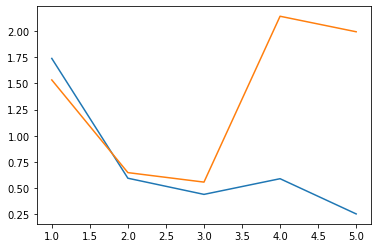

In [70]:
#fig= plt.Figure(figsize=(20,16))
#ax= fig.add_axes((0,0,1,1))
plt.plot(range(1,6), train_rmse_errors[:5], label = 'train_rmse')
plt.plot(range(1,6), test_rmse_errors[:5], label = 'test_rmse')




In [71]:
filepath_poly= os.path.join(model_dir, 'model1.joblib')
dump(model1,filepath_poly)

['modles\\model1.joblib']

In [72]:
load_model_poly = load(r'C:\Users\revan\Desktop\ml\modular2\mlmar7\modles\model1.joblib')

In [73]:
load_model_poly.coef_

array([ 5.25319441e-02,  1.42773271e-02,  1.47528851e-02, -1.12739168e-04,
        1.13231490e-03, -5.42180033e-05,  6.26813126e-05,  8.93347558e-05,
       -3.52004070e-05])